Processing <PIL.JpegImagePlugin.JpegImageFile image mode=L size=512x512 at 0x7F96F9663A90>
[[ 1  1  2 ...  1  3  4]
 [ 1  2  2 ...  1  4  6]
 [ 2  2  2 ...  5  4  1]
 ...
 [ 1  3  5 ...  0  3  5]
 [ 2  1  1 ... 14  8 12]
 [ 1  1  2 ... 23  6  5]]
53
Converted: neurofinder.01.01/jpg/image00000.small2.jpg
{(90, 350): [104, 110, 81, 119, 108, 113, 123, 181, 150, 186, 140, 175, 217, 194, 177, 250, 238, 255, 255, 250, 234, 255, 253, 196, 165, 165, 247, 255, 224, 197, 192, 215, 253, 253, 225, 255, 255, 255, 254, 254, 239, 226, 255, 230, 161, 255, 150, 174, 255, 183, 232, 242, 224, 255, 228, 244, 254, 202, 125, 253, 131, 144, 173, 201, 158, 157, 198, 246, 248, 249, 189, 255, 229, 240, 217, 183, 211, 203, 213, 184, 252, 238, 173, 208, 156, 186, 251, 176, 245, 167, 217, 222, 105, 140, 172, 119, 220, 163, 209, 197, 246, 254, 163, 255, 227, 113, 241, 164, 163, 245, 200, 214, 171, 134, 162, 205, 189, 174, 234, 170, 134, 139, 147, 201, 208, 204, 200, 198, 207, 218, 168, 186, 175, 116, 135, 165, 169

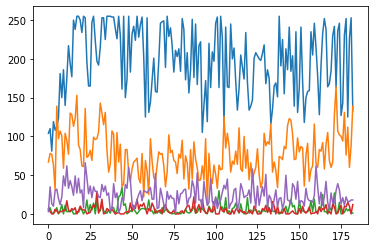

In [50]:
import os, sys
from PIL import Image
import numpy as np

images = ['neurofinder.01.01/jpg/image00000.jpg']

rois = [(90,350),(205,355),(100,100),(230,20),(400,200)]

for infile in images: 

    outfile = os.path.splitext(infile)[0] + ".small2.jpg"
    if infile != outfile:
        try:
            with Image.open(infile) as im:
                print('Processing %s'%im)
                a = np.asarray(im)
                b = np.array(a)
                print(a)
                print(max(a[256]))
                for roi in rois:
                    for x in range(10):
                        for y in range(10):
                            i=x+roi[0]
                            j=y+roi[1]
                            b[i][j] =111
                '''
                box = (200,200,200,200)
                region = im.crop(box)
                region = region.transpose(Image.ROTATE_180)
                im.paste(region, box)'''
                #im.thumbnail(size)
                im = Image.fromarray(b)
                im.save(outfile, "JPEG")
                print('Converted: %s'%outfile)
                
        except OSError:
            print("cannot create thumbnail for", infile)
            
images = []
for i in range(183):
    index = str(i)
    while len(index)<3:
        index='0%s'%index
    images.append('neurofinder.01.01/jpg/image0%s0.jpg'%index)
    
ca = {}
for roi in rois:
    ca[roi] = []
for infile in images: 
    with Image.open(infile) as im:
        #print('Processing %s'%im)
        a = np.asarray(im)
        for roi in rois:
            val = a[roi[0],roi[1]]
            #print('Value at: %s = %s'%(roi, val))
            ca[roi].append(val)
print(ca)
    
import matplotlib.pyplot as plt

for roi in rois:
    plt.plot(ca[roi],label=roi)


        

!ls -alt